# Sampling tutorial (2019)

# Exercise 1: Building blocks of sampling algorithms

To better understand the accept/reject step of the Metropolis-Hastings algorithm, implement a random walk along the positive and negative x-axis as follows. The starting position of your random walker is arbitrary, you may choose the origin.

1) Provide storage space for a sequence of numbers which will represent the position on the $x$-axis.

In [580]:
# Imports.
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [581]:
storage_space = []

2) Invent an algorithm $A1$ which generates random numbers which are either -1 or +1 with the same frequency.

In [582]:
def A1():
    val = rd.getrandbits(1)
    if val == 1:
        return 1
    if val == 0:
        return -1

3) Invent an algorithm $A2$ which accepts a number proposed to it with probability $p [0,1]$

In [583]:
def A2(p_given):
    p = rd.random()
    if p >= p_given:
        return True
    else:
        return False    

4) Combine $A1$ and $A2$ or invent $A3$. The aim is to accept $-1$s and $+1$s with probabilities $1-p$ and $p$.

In [584]:
def A3(p_given):
    rand_number = A1()
    p = rd.random()
    if p >= p_given and rand_number == 1:
        return rand_number
    if p < p_given and rand_number == -1:
        return rand_number
    else:
        return A3(p_given)

5) Add the accepted random number to the current position of the walker.

**Answer**: See next coding cells.

6) For different values of $p$, how does the walker drift aliong the axis? Plot its path: By plotting position against index number, you can see how it walks.

In [642]:
def make_plot(ax,storage_space,n_samples,p_given):
    for i in range(n_samples):
        storage_space.append(A3(p_given))

    length_arr = np.linspace(1,n_samples,n_samples)

    sum_arr = []
    sum_arr.append(storage_space[0])
    for i in range(1,n_samples):
        sum_arr.append(sum_arr[i-1]+storage_space[i])

    #plt.figure(figsize=(16,8))
    ax.scatter(length_arr,sum_arr,s=0.2,label=f'p = {p_given:.2f}')
    ax.set_xlabel('Number of samples',fontsize=10)
    ax.set_ylabel('Random walk',fontsize=10)
    #ax.set_ylim(-n_samples,n_samples)
    ax.legend()

    # Empty the storage space for new runs.
    storage_space=[]
    
    return ax

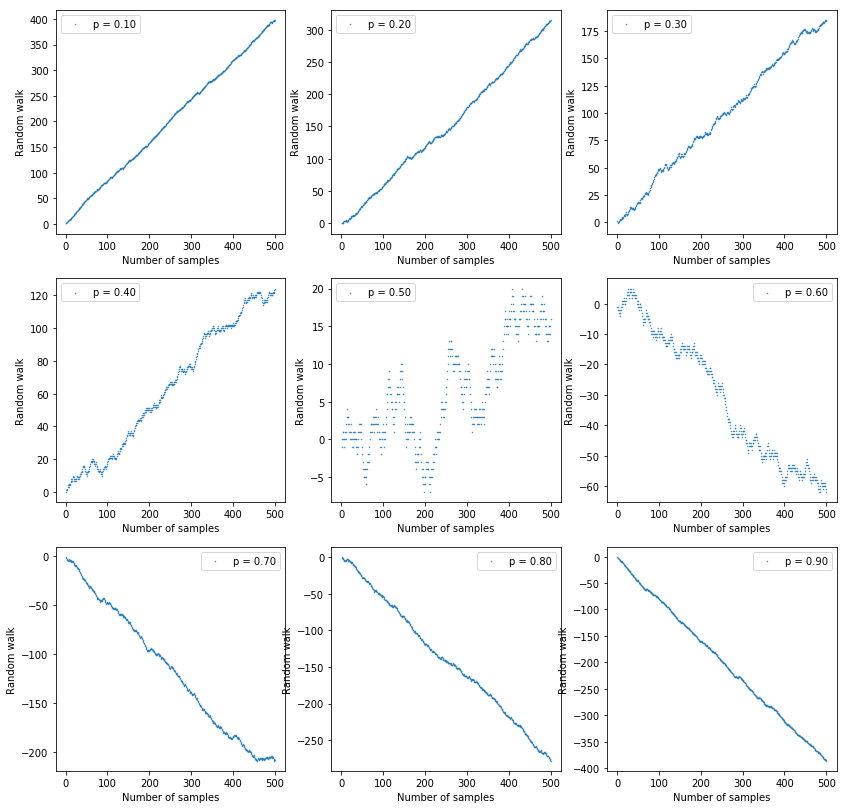

In [643]:
plot_size = 3 # Square root, so size 3 will result in 3x3=9 plots.
n_samples = 500
lower_p_bound = 0.1
upper_p_bound = 0.9
p_given = np.linspace(lower_p_bound,upper_p_bound,plot_size**2)

plt.figure(figsize=(14,14))

for i in range(plot_size):
    for j in range(plot_size):
        storage_space = []
        for k in range(n_samples):
            storage_space.append(A3(p_given[i*plot_size+j]))

        cur_ax = plt.subplot(plot_size,plot_size,1+i*plot_size+j)
        make_plot(cur_ax,storage_space,n_samples,p_given[i*plot_size+j])
        
plt.show()
plt.close()

7) Is this random walk Markovian?

**Answer**: Don't think so

### Exercise 2: MCMC of Supernova data; measureing $\Omega_m$, $w_0$, $w_a$

Supernovae of type Ia occur in the late Universe and can be used to constrain dark matter and dark energy. The files ‘Supernova_Seed176.txt’ and ‘Supernova_Seed177.txt’ contain two Monte Carlo Markov Chains. These sampled the posterior $\mathcal{P}(\Omega_m,w_0,w_a|x)$, where $\Omega_m$ is the dark matter density (it can theoretically take values between 0 and 1). The parameters $w_0$ and $w_a$ are the equation-of-state parameters for Dark
Energy today (subscript zero), and the first Taylor-order of a potential cosmic evolution (if $w_a = 0$, then Dark Energy doesn’t evolve). If $w_0 = -1$, then one speaks of ‘Dark Energy being a cosmological constant’, which is indeed the currently preferred model.
The given chains are already cleaned. For this exercise scatter plots (dots on a canvas) and histograms are sufficient.

1. Identify which of the 4 columns stores the log-likelihood.

In [637]:
# Read in data.
path_176 = 'data/Supernova_Seed176.txt'
path_177 = 'data/Supernova_Seed177.txt'

data_176 = np.loadtxt(path_176)
data_177 = np.loadtxt(path_177)

print(f'Sizes: {np.shape(data_176)},{np.shape(data_177)}')

Sizes: (146882, 4),(147528, 4)


2. Plot the posterior in 3d (splot in gnuplot). If you use tiny dots, you will be able to distinguish regions of high and low density. What do these regions indicate?

**Answer**:

3. How many 2d marginals are there for 3 parameters? Plot all of them.

**Anwer**:

4. Identify which of the columns stores which parameter, using the text above. Label the axes accordingly.

**Answer**:

5. Find the maximum of the posterior. Which are the most likely values for $\Omega_m$, $w_0$, $w_a$?

**Answer**:

6. Plot the marginal distribution of $\Omega)m$, i.e. plot $\mathcal{P}(\Omega_m|x)$.

**Answer**:

7. For $\Omega_m = 0.1$, judge by eye which values of $w_0$ are compatible with the data.

**Answer**:

8. According to measurements of the cosmic microwave background (CMB), 
$\Omega_m$ is already rather well known: the CMB yields the contraints 
$\Omega_m = 0.315 \pm 0.017$, with a very Gaussian posterior. Reweigh
the supernova chain to combine the experiments. Plot the new, joint posterior.

**Answer**:

### Exercise 3: Uncleaned MC chain from a cosmic microwave background analysis

The file ‘Bad_NeutrinoViscosity_Chain.txt’ contains an uncleaned Monte Carlo Markov Chain. When opening the file, you will see that it contains more columns than the supernova chain. This is because more
parameters were varied this time. A real analysis would contain 10,15,20... further columns, so this is still a
very small chain.

1. The chain was created by a sampler which weights repeated points by integer weights. The sampler also stores the log-likelihood. Which columns store the integer weights? Why does MCMC need those weights?

In [720]:
# Read in data.
data_loc = 'data/Bad_NeutrinoViscosity_Chain.txt'
data= np.loadtxt(data_loc)

print(f'Data shape: {np.shape(data)}')

Data shape: (6465, 11)


**Answer**:

2. Which column stores the log-likelihood?

**Answer**:

3. Plot the log-likelihood against interation number. What do the steep drop and the plateau tell you about the quality of the chain? Describe what the sampler does in these two phases.

**Answer**:

4. Plot the joint density of 2 arbitrary parameters. Why does the chain look the way it does?

**Answer**:

### Exercise 4: Monte Carlo and the curse of dimensionality

To understand why sampling becomes quickly more efficient than grid computations, we compute all the empty space where a grid would evaluate the likelihood in vain. For this, let $d$ be the dimension of an $R^d$.

1. Compute the volume $V_c(d)$ of the unit hyper-cube in dimension $d$ (i.e. the hyper-cube of side length unity).

In [649]:
# Imports.
import scipy.special as sc

In [708]:
# Dimension array.
max_dim = 40
dim_arr = np.linspace(0,max_dim,max_dim+1)

In [709]:
def compute_volume_hypercube(d,r=1):
    return r**d

In [710]:
# Compute volumes for different dimensions.
vol_cube = compute_volume_hypercube(dim_arr,r=1)

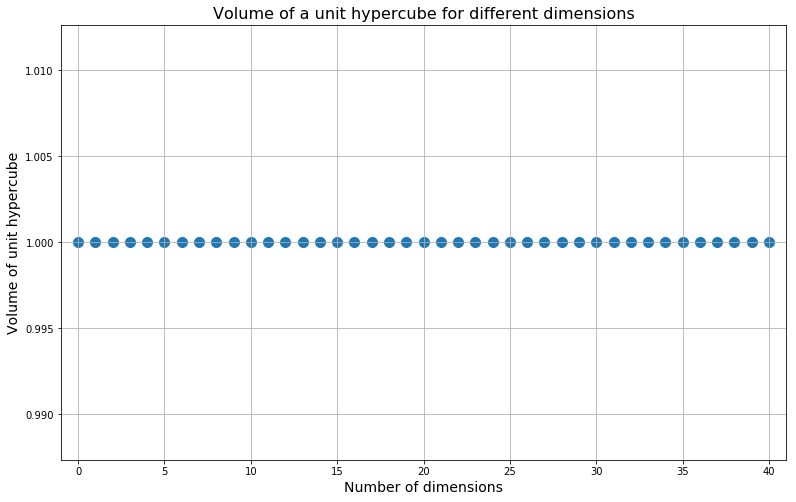

In [711]:
# Plot it.
plt.figure(figsize=(13,8))
plt.scatter(dim_arr,vol_cube,s=100)
plt.title('Volume of a unit hypercube for different dimensions',fontsize=16)
plt.xlabel(f'Number of dimensions',fontsize=14)
plt.ylabel(f'Volume of unit hypercube',fontsize=14)
plt.xlim(-1,max_dim+1)
plt.grid()
plt.show()
plt.close()

2. Compute the volume $V_s(d)$ of the unit hyper-sphere in dimension $d$.

In [712]:
# Taken from wikipedia.
def compute_volume_hypersphere(d,r=1):
    return np.pi**(d/2)/sc.gamma(d/2+1)*r**d

In [713]:
# Compute volumes for different dimensions.
vol_sphere = compute_volume_hypersphere(dim_arr)
vol_sphere /= np.pi

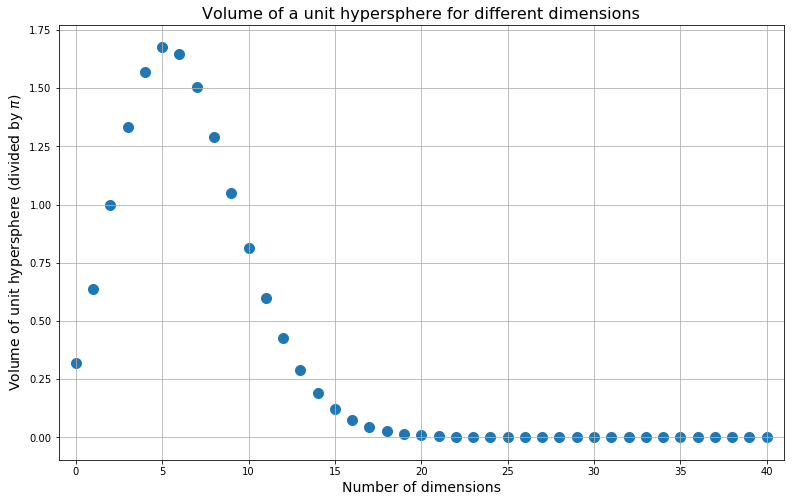

In [714]:
# Plot it.
plt.figure(figsize=(13,8))
plt.scatter(dim_arr,vol_sphere,s=100)
plt.title('Volume of a unit hypersphere for different dimensions',fontsize=16)
plt.xlabel(f'Number of dimensions',fontsize=14)
plt.ylabel(f'Volume of unit hypersphere (divided by $\pi$)',fontsize=14)
plt.xlim(-1,max_dim+1)
plt.grid()
plt.show()
plt.close()

3. Plot $V_s(d) / V_c(d)$ as a function of $d$. What happens to the sphere?

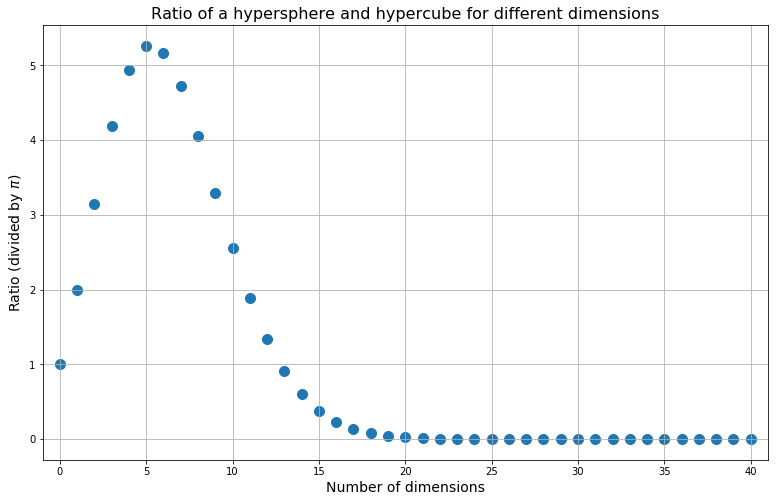

In [715]:
radius = 1
ratio = compute_volume_hypersphere(dim_arr,radius)/compute_volume_hypercube(dim_arr,radius)

plt.figure(figsize=(13,8))
plt.scatter(dim_arr,ratio,s=100)
plt.title('Ratio of a hypersphere and hypercube for different dimensions',fontsize=16)
plt.xlabel(f'Number of dimensions',fontsize=14)
plt.ylabel(f'Ratio (divided by $\pi$)',fontsize=14)
plt.xlim(-1,max_dim+1)
plt.grid()
plt.show()
plt.close()

**Answer**: Apparently the volume of the sphere goes to zero somewhere around 20 dimensions, this makes sense since you measured with respect to the unit hypercube in the current dimensions.

**Extra question**: Why does sampling become quickly more efficient than grid computations? I do not understand this from the plots I generated.

**Answer**:

### Exercise 5: Gibbs sampling the straight line with dual errors (optional)

**Answer**:

### Exercise 6: Computing confidence contours (optional)

Confidence contours, or credibility contours, cut a likelihood or posterior at a certain height. If the likelihood/posterior is sampled, then the samples have first to be converted into histograms, and the histogram bins then form the basis of where to cut the likelihood/posterior. Implement this task as follows.

1. Vectorize the 2-d histogram bins, i.e. sort them into an auxilliary array which has only one index $h(k)$, where $k = f(i,j)$ uniquely assignes a single value $k$ to each pair $i,j$.

**Answer**:

2. Rearrange the auxilliary array $h(k)$ such that it is monotonically decreasing with $k$. Stepping from small to increasing $k$ is now akin to ‘walking down the posterior in a spiral’.

**Answer**:

3. Compute the total posterior likelihood thus stored in the array (i.e. sum over the array).

**Answer**:

4. Compute which heights $h(k)$ demark the level at which 68% and 95% of the total posterior volume have been summed up.

**Answer**:

5. Plot confidence contours at those levels.

**Answer**: